# Import

In [1]:
import os

import numpy as np
import matplotlib.pyplot as plt

import algorithm
import datasets

from sklearn.linear_model import LogisticRegression as ScikitLogisticRegression
from sklearn.datasets import load_iris
from sklearn import metrics

In [2]:
from scipy.stats import multivariate_normal

# LDA Implementation

In [3]:
def pdf(x, y, mu, sigma):
    return (1/(2*np.pi*np.linalg.det(sigma)^.5)) * np.exp()

In [4]:
class LDA(algorithm.BinaryClassifier):
    """
    LDA
    """
    def __init__(self, threshold=0.5):
        """
        newton_eps: stopping criterion
        """
        super().__init__(threshold=threshold)
        
    
    def loss(self):
        """
        negative log likelihood
        """
        pred = sigmoid(self.X_train.dot(self.w))
        
        return -E
    
    
    def initialize(self, X_train, y_train):
        super().initialize(X_train, y_train)
        self.classes = np.unique(y_train)
        self.pi = np.zeros((len(self.classes),))
        self.mu = np.zeros((len(self.classes), self.d))
        self.sigma = np.zeros((self.d, self.d))
        
        
        
    def fit(self, X_train, y_train):
        self.initialize(X_train, y_train)
        
        
        for k in self.classes:
            N_k = len(self.y_train[self.y_train == k])
            X_class_k = self.X_train[self.y_train == k,:]
            
            self.pi[k] = N_k/self.n
            self.mu[k,:] = np.mean(X_class_k, axis=0)
            self.sigma += (X_class_k - self.mu[k,:]).T.dot(X_class_k - self.mu[k,:])
        self.sigma /= self.n
        
        assert np.sum(self.pi) == 1, self.pi

    
    def predict_class(self, X_test):
        log_proba = np.zeros((len(X_test), len(self.classes)))
        for k in self.classes:
            log_proba[:, k] = np.log(self.pi[k])
            log_proba[:, k] -= .5*np.sum((X_test - self.mu[k,:]).dot(np.linalg.inv(self.sigma))*(X_test-self.mu[k,:]), axis=1)
        return np.argmax(log_proba,axis=1)
    
    def visualize(self, X_test, n_points=20):
        x_min = np.min(X_test[:,0])
        x_max = np.max(X_test[:,0])
        
        y_min = np.min(X_test[:,1])
        y_max = np.max(X_test[:,1])
        
        x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
        pos = np.dstack((x, y))
        
        for k in self.classes:
            rv = multivariate_normal(self.mu[k,:], self.sigma)

            plt.contourf(x, y, rv.pdf(pos), alpha=0.3)
        
        
    def plot_decision_boundary(self, X_test, n_points=200):
        pass

# QDA

In [5]:
class QDA(algorithm.BinaryClassifier):

    def __init__(self, threshold=0.5):
        """
        newton_eps: stopping criterion
        """
        super().__init__(threshold=threshold)
        
    
    def loss(self):
        """
        negative log likelihood
        """
        pass
    
    
    def initialize(self, X_train, y_train):
        super().initialize(X_train, y_train)
        self.classes = np.unique(y_train)
        self.pi = np.zeros((len(self.classes),))
        self.mu = np.zeros((len(self.classes), self.d))
        self.sigma = np.zeros((len(self.classes),self.d, self.d))
        
        
        
    def fit(self, X_train, y_train):
        self.initialize(X_train, y_train)
        
        
        for k in self.classes:
            N_k = len(self.y_train[self.y_train == k])
            X_class_k = self.X_train[self.y_train == k,:]
            
            self.pi[k] = N_k/self.n
            self.mu[k,:] = np.mean(X_class_k, axis=0)
            self.sigma[k,:,:] = (X_class_k - self.mu[k,:]).T.dot(X_class_k - self.mu[k,:])/N_k
        
        assert np.sum(self.pi) == 1, self.pi

    
    def predict_class(self, X_test):
        log_proba = np.zeros((len(X_test), len(self.classes)))
        for k in self.classes:
            log_proba[:, k] = np.log(self.pi[k])
            log_proba[:, k] -= .5*np.sum((X_test - self.mu[k,:]).dot(np.linalg.inv(self.sigma[k,:,:]))*(X_test-self.mu[k,:]), axis=1)
        return np.argmax(log_proba,axis=1)
    

    def visualize(self, X_test, n_points=20):
        x_min = np.min(X_test[:,0])
        x_max = np.max(X_test[:,0])
        
        y_min = np.min(X_test[:,1])
        y_max = np.max(X_test[:,1])
        
        x, y = np.mgrid[x_min:x_max:.01, y_min:y_max:.01]
        pos = np.dstack((x, y))
        
        for k in self.classes:
            rv = multivariate_normal(self.mu[k,:], self.sigma[k,:,:])
            #fig2 = plt.figure()
            #ax2 = fig2.add_subplot(111)
            plt.contourf(x, y, rv.pdf(pos), alpha=0.3)
    
    def plot_decision_boundary(self, X_test, n_points=200):
        pass

# 2D synthetic dataset

In [6]:
dummy = datasets.DummyDataset2D(means = [[30,45], [38,48]], 
                                cov=[[[2,3],
                                     [3,1]],
                                     [[3,-2],
                                     [-2,3]]],
                                      N=200, )
X,y = dummy.generate()

/home/cindy/Documents/projets/my_github/machine_learning_algorithms/datasets.py:58: RuntimeWarning: covariance is not positive-semidefinite.
  x_pos = np.random.multivariate_normal(mean=self.means[0], cov=self.cov[0], size=(self.N//2))


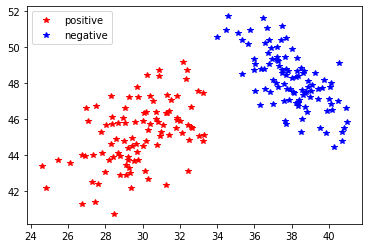

In [7]:
dummy.plot()

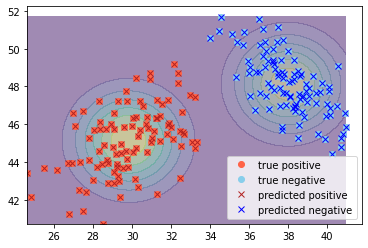

In [8]:
lda = LDA()
lda.fit(X,y)
lda.plot_2D(X,y)

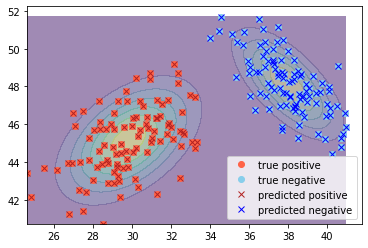

In [9]:
qda = QDA()
qda.fit(X,y)

qda.plot_2D(X,y)

## Robustness to outliers

In [10]:
dummy = datasets.DummyDataset2D(means = [[30,40], [33,43]], N=200, )
dummy.generate();
dummy.add_rnd_normal(mean=[28,28], n=5)

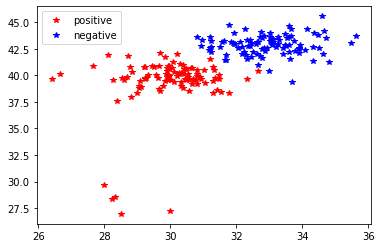

In [11]:
dummy.plot()

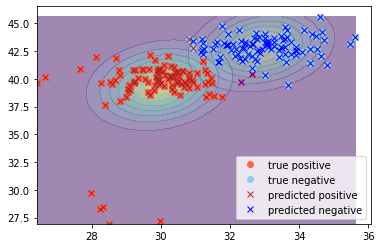

In [12]:
X,y = dummy.X, dummy.y
lda = LDA()
lda.fit(X,y)
lda.plot_2D(X,y)

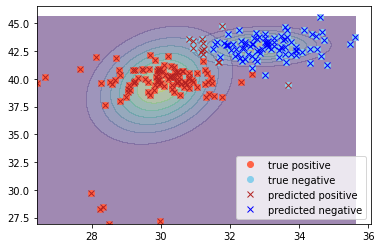

In [13]:
X,y = dummy.X, dummy.y
qda = QDA()
qda.fit(X,y)
qda.plot_2D(X,y)

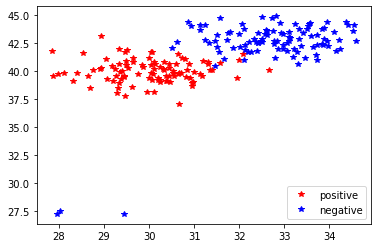

In [18]:
dummy = datasets.DummyDataset2D(means = [[30,40], [33,43]], N=200, )
dummy.generate();
dummy.add_rnd_normal(mean=[28,28], n=3, positive=0)
dummy.plot()

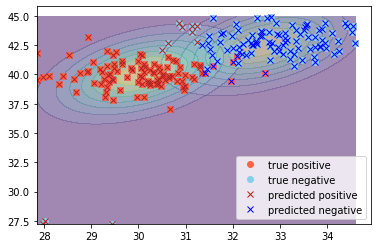

In [19]:
X,y = dummy.X, dummy.y
lda = LDA()
lda.fit(X,y)
lda.plot_2D(X,y)

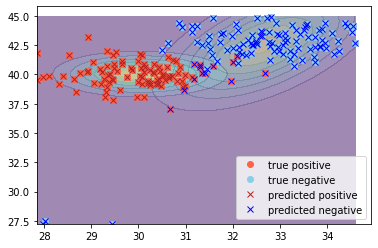

In [20]:
X,y = dummy.X, dummy.y
qda = QDA()
qda.fit(X,y)
qda.plot_2D(X,y)

# MNIST dataset

In [46]:
digit_dataset = datasets.Digits()

In [47]:
X_train, X_test, y_train, y_test = digit_dataset.generate_train_test(digits=[0,1]);

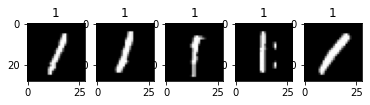

In [48]:
digit_dataset.display_digits()

In [53]:
std_train = np.std(X_train, axis=0)

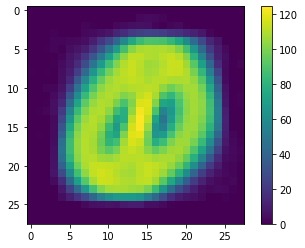

In [54]:
plt.imshow(std_train.reshape((28,28)))
plt.colorbar()

In [55]:
significant_pixels = std_train >100

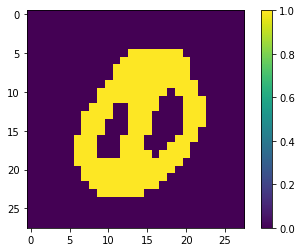

In [56]:
std_significant = std_train
std_significant[~significant_pixels] = 0
std_significant[significant_pixels] = 1
plt.imshow(std_significant.reshape((28,28)))
plt.colorbar()

In [57]:
# Drop unsignificant pixels
significant_X_train = X_train[:,significant_pixels]
significant_X_test = X_test[:,significant_pixels]

In [58]:
significant_X_train.shape

(6171, 189)

In [60]:
lda = LDA()
lda.fit(significant_X_train,y_train)


In [61]:
lda.evaluate(significant_X_test, y_test)

(0.9905482041587902, 0.9937629937629938, 0.9889655172413793)

In [43]:
lr_scikit = ScikitLogisticRegression()

lr_scikit.fit(significant_X_train,y_train)
lr_scikit.score(significant_X_train,y_train)

/home/cindy/miniconda3/envs/mainenv/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


1.0

In [44]:
lr_scikit.score(significant_X_test,y_test)

0.9973534971644612

In [45]:
w_scikit=  lr_scikit.coef_

In [47]:
w_scikit.dot(w_scikit.T)

array([[0.00290798]])